# Question 1
## Developing an Artificial Neural Network from Scratch.

In this notebook, we will be developing a fully connected feedforward neural network.

We will import the MNIST dataset from keras datsets. The MNIST dataset contains images of 28x28 pixels each having values ranging from 0-255.
It has 60000 images in the training set and 10000 images in the test set. However, we will only use the first 10000 images for training and first 1000 images for testing because our code isn't optimized and it takes time to run. We are not looking for accuracy of our network right now, we will be doing that in the next question when we will be implementing the same using Tensorflow.


Run the first 3 cells. Your code begins after that.

In [45]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
import random

In [46]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


As discussed in the class, the images are flattened to a column.

Then we are normalizing them by dividing by 255.

In [47]:
train_X=train_X.reshape(60000,784,1)    # flattening
test_X=test_X.reshape(10000,784,1)

train_y=train_y.reshape(60000,1)
test_y=test_y.reshape(10000,1)

train_X= train_X/255
test_X = test_X/255

train_X=train_X[:10000]         #taking the first 10000 images.
train_y=train_y[:10000]
test_X=test_X[:1000]
test_y=test_y[:1000]
train_data=list(zip(train_X,train_y))
test_data=list(zip(test_X,test_y))

## 1.1 Write the code for Sigmoid Function.

In [48]:
def sigmoid(z):
  a=1.0/(1.0+ np.exp(-z))
  return a

## 1.2 The Network

We will making a class called Network which has certain functions inside it. The cost function used is Cross-Entropy Loss. You need to code only the first 3. Rest are done for you.  There are various places within the code marked as stop_zone. Read the instructions below the code at those places to check whether your code till there is correct or not.

In [79]:
class Network(object):
    def __init__(self,sizes): # sizes is a list containing the network.
                              # eg : [784,128,10] means input =784 neurons,
                              #    1st hidden layer 128 neurons, output 10 neurons.
        self.sizes=sizes
        self.num_layers=len(sizes)
        self.weights= [np.random.randn(x,y) for x,y in zip(sizes[1:],sizes[:-1])]
        self.biases= [np.random.randn(x, 1) for x in sizes[1:]]

    def show(self):
        print(self.num_layers)
        for bias in self.biases:
            print(bias.shape)
        for weight in self.weights:
            print(weight.shape)
              

# stop_zone 1. Comment out all the code below. Select all rows below. Click Ctrl + /.
# Include the show function given below above this comment area inside the class.
# Run this cell and then run the code with stop_zone 1 written below.
# After this testing, don't forget to remove the comments. Same, select all, Ctrl+/.

    def forwardpropagation(self,a):
        for b,w in zip(self.biases, self.weights):
            a=sigmoid(np.dot(w,a)+b) # sig (w.a +b)
            print(a.shape)
        return a

# stop_zone 2. Comment out all the code below. Don't comment out the __init__ method else you will get error.
# Remove comment from print(a.shape) line above. Run this cell. And run the code with stop_zone 2 written below.


    def backpropagation(self,x,y):

        # nothing to do in this 3 lines. it is for creating a one-hot encoded vector of the labels.
        y_t = np.zeros((len(y), 10))
        y_t[np.arange(len(y)), y] = 1
        y_t= y_t.T

        #nabla_b=dC/db and nabla_w=dC/dw. They are lists of shapes equal to that of bias and weights.
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]

        # initially, a0 = input.
        activation=x
        activation_list=[x]

        # step 1 : calculation of delta in last layer

        # write the same forward propagation code here but while doing so store the a's.
        for w,b in zip(self.weights,self.biases):
            activation= sigmoid(np.dot(w,activation)+b)
            activation_list.append(activation)

        delta = (activation_list[-1] - y_t) * activation_list[-1] * (1 - activation_list[-1])

        # step 2 : nabla_b and nabla_w relation with delta of last layer

        nabla_b[-1] = delta  # dC/db3 = delta
        nabla_w[-1] = np.dot(delta, activation_list[-2].transpose())

        print("{} {}".format(nabla_b[-1].shape,nabla_w[-1].shape) )
#stop_zone 3 : remove comment from the print statement just above and run the cell for stop_zone3.
# don't forget commenting out.

        # step 3 : calculation of delta for hidden layers

        for j in range(2,self.num_layers):
            sig_der = activation_list[-j]*(1-activation_list[-j])
            delta=np.dot(self.weights[-j + 1].transpose(), delta)* sig_der
            # step 4 : nabla_b and nabla_w relation with delta of others layers
            nabla_b[-j]= delta
            nabla_w[-j]= np.dot(delta, activation_list[-j-1].transpose())

        return (nabla_b,nabla_w)
# #stop_zone 4 : Run the cell for stop_zone 4.

    def SGD(self, train_data,epochs,mini_batch_size, lr):
        n_train= len(train_data)
        for i in range(epochs):
            random.shuffle(train_data)
            mini_batches = [train_data[k:k+mini_batch_size] for k in range(0, n_train, mini_batch_size)]
#   # Stop zone 5 : Remove comment from the next print line and comment out all the lines below it.
        print(np.array(mini_batches, dtype=object).shape)

        for mini_batch in mini_batches:
            self.update_mini_batch(mini_batch,lr)

        self.predict(train_data)
        print("Epoch {0} completed.".format(i+1))

    # the functions below are complete. If you are fine till stop_zone 5, you can run
    # this whole cell and train, test the data by running the last cell of the notebook.
    # You may need to wait for around 10 minutes to see the test predictions.

    def update_mini_batch(self,mini_batch,lr):
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]
        for x,y in mini_batch:
            delta_b,delta_w= self.backpropagation(x,y)
            nabla_b=[nb+ db for nb,db in zip (nabla_b,delta_b)]
            nabla_w=[nw+dw for nw,dw in zip(nabla_w,delta_w)]

        self.weights=[w- lr*nw/len(mini_batch) for w,nw in zip(self.weights,nabla_w)]
        self.biases=[b-lr*nb/len(mini_batch) for b,nb in zip(self.biases,nabla_b)]

    def predict(self,test_data):
        test_results = [(np.argmax(self.forwardpropagation(x)),y) for x,y in test_data]
        # returns the index of that output neuron which has highest activation

        num= sum(int (x==y) for x,y in test_results)
        print ("{0}/{1} classified correctly.".format(num,len(test_data)))



In [59]:
# stop_zone 1

# def show(self):
#   print(self.num_layers)
#   for bias in self.biases:
#       print(bias.shape)
#   for weight in self.weights:
#       print(weight.shape)

# Copy this show function from here. Paste it inside that Network Class.
# Comment out the show function here. Run this cell.

net=Network([784,128,64,10])
net.show()

# The desired output is :
# 4
# (128, 1)
# (64, 1)
# (10, 1)
# (128, 784)
# (64, 128)
# (10, 64)
#  If you are getting this, you are correct. Proceed to forwardpropagation.

# Keeping the show function over there in the Network class doesn't make any
# difference. You may delete it if you wish. Better toss a coin.

4
(128, 1)
(64, 1)
(10, 1)
(128, 784)
(64, 128)
(10, 64)


In [60]:
# stop_zone 2
# to use this, make sure your data is loaded. Run this cell.
net=Network([784,128,64,10])
# print(train_X[0])
net.forwardpropagation(train_X[0])

# The desired output is :
# (784, 1)
# (128, 1)
# (64, 1)
# (10, 1)
#  If you are getting this, you are correct. Proceed to forwardpropagation.

(128, 1)
(64, 1)
(10, 1)


array([[7.63098881e-01],
       [4.90818805e-01],
       [5.54550191e-01],
       [9.63325270e-05],
       [9.85385972e-01],
       [3.67158702e-02],
       [9.00724070e-06],
       [9.99646105e-01],
       [6.65927856e-02],
       [8.36272242e-02]])

In [70]:
# stop_zone 3
net=Network([784,128,64,10])
net.backpropagation(train_X[0],train_y[0])

# Desired output : (10,1) (10,64)

(10, 1) (10, 64)


In [74]:
# stop_zone 4
net=Network([784,128,64,10])
nabla_b,nabla_w=net.backpropagation(train_X[0],train_y[0])
for nb in nabla_b:
  print(nb.shape)
for nw in nabla_w:
  print(nw.shape)

# Desired output:
# (128, 1)
# (64, 1)
# (10, 1)
# (128, 784)
# (64, 128)
# (10, 64)

(10, 1) (10, 64)
(128, 1)
(64, 1)
(10, 1)
(128, 784)
(64, 128)
(10, 64)


In [80]:
# Stop zone 5 :  Run this cell, for 10000 samples and batch size of 20, output should be
#       (500,20,2).  500 batches each of size 20 and has 2 objects : train and test data.

net=Network([784,256,128,64,10])
net.SGD(train_data=train_data,epochs=20,mini_batch_size=20,lr=0.01)

(500, 20, 2)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(

C:\Users\Arsh\AppData\Local\Temp\ipykernel_15576\2734892469.py:111: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num= sum(int (x==y) for x,y in test_results)


In [81]:
net=Network([784,128,64,10])
net.SGD(train_data=train_data,epochs=10,mini_batch_size=20,lr=0.01)
print("Test data:")
net.predict(test_data)

(500, 20, 2)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(10, 1) (10, 64)
(

C:\Users\Arsh\AppData\Local\Temp\ipykernel_15576\2734892469.py:111: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  num= sum(int (x==y) for x,y in test_results)


1223/10000 classified correctly.
Epoch 10 completed.
Test data:
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(6

# End of question 1

# Question 2

In this question, you'll build a model to predict hotel cancellations with a binary classifier.

In [82]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.available
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [83]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('hotel.csv')

X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

# 1) Define Model #

The model we'll use this time will have both batch normalization and dropout layers. To ease reading we've broken the diagram into blocks, but you can define it layer by layer as usual.

Define a model with an architecture given by this diagram:

<figure style="padding: 1em;">
<img src="Architecture.png" width="400" alt="Diagram of network architecture: BatchNorm, Dense, BatchNorm, Dropout, Dense, BatchNorm, Dropout, Dense.">
<figcaption style="textalign: center; font-style: italic"><center>Diagram of a binary classifier.</center></figcaption>
</figure>

In [91]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

# YOUR CODE HERE: define the model given in the diagram
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[63]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

In [85]:
model.summary()
# The Required Output is 
#Model: "sequential"
#┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
#┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
#┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
#│ batch_normalization             │ (None, 62)             │           248 │
#│ (BatchNormalization)            │                        │               │
#├─────────────────────────────────┼────────────────────────┼───────────────┤
#│ dense (Dense)                   │ (None, 256)            │        16,128 │
#├─────────────────────────────────┼────────────────────────┼───────────────┤
#│ batch_normalization_1           │ (None, 256)            │         1,024 │
#│ (BatchNormalization)            │                        │               │
#├─────────────────────────────────┼────────────────────────┼───────────────┤
#│ dropout (Dropout)               │ (None, 256)            │             0 │
#├─────────────────────────────────┼────────────────────────┼───────────────┤
#│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
#├─────────────────────────────────┼────────────────────────┼───────────────┤
#│ batch_normalization_2           │ (None, 256)            │         1,024 │
#│ (BatchNormalization)            │                        │               │
#├─────────────────────────────────┼────────────────────────┼───────────────┤
#│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
#├─────────────────────────────────┼────────────────────────┼───────────────┤
#│ dense_2 (Dense)                 │ (None, 1)              │           257 │
#└─────────────────────────────────┴────────────────────────┴───────────────┘
 #Total params: 251,125 (980.96 KB)
 #Trainable params: 83,325 (325.49 KB)
# Non-trainable params: 1,148 (4.48 KB)
# Optimizer params: 166,652 (650.99 KB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 4)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

# 2) Add Optimizer, Loss, and Metric #

Now compile the model with the Adam optimizer and binary versions of the cross-entropy loss and accuracy metric.

In [92]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

Epoch 1/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - binary_accuracy: 0.6029 - loss: 0.6439 - val_binary_accuracy: 0.6314 - val_loss: 0.5611
Epoch 2/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7404 - loss: 0.5440 - val_binary_accuracy: 0.7988 - val_loss: 0.5139
Epoch 3/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8002 - loss: 0.5103 - val_binary_accuracy: 0.8027 - val_loss: 0.4946
Epoch 4/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8078 - loss: 0.4765 - val_binary_accuracy: 0.8088 - val_loss: 0.4360
Epoch 5/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8115 - loss: 0.4304 - val_binary_accuracy: 0.8101 - val_loss: 0.4258
Epoch 6/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8118 - loss: 0.4221 - val_binary_accuracy: 0.8080 - val_loss: 0.4223
Epoch 7/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8127 - loss: 0.4164 - val_binary_accuracy: 0.8098 - val_loss: 0.4177

<Axes: title={'center': 'Accuracy'}>

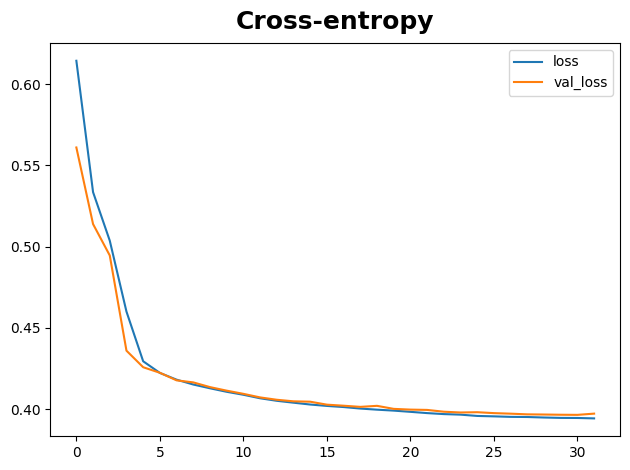

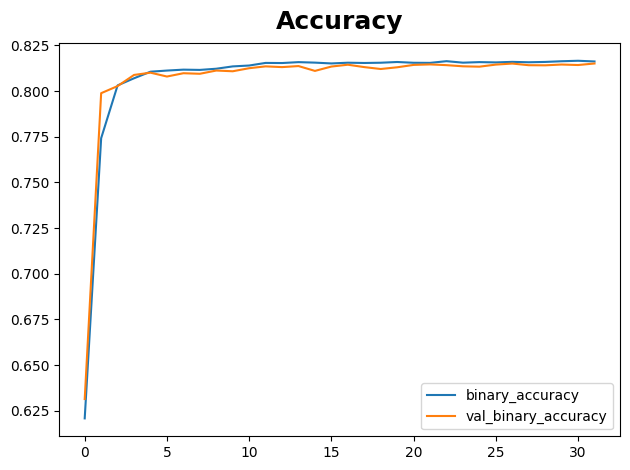

In [93]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")